In [4]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

# Initialize the CNN
classifier = Sequential()

# Convolution + Pooling Layers
classifier.add(Convolution2D(96, (11, 11), strides=(4, 4), padding='valid', input_shape=(224, 224, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, (11, 11), strides=(1, 1), padding='valid', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(384, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(384, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
classifier.add(BatchNormalization())

classifier.add(Convolution2D(256, (3, 3), strides=(1, 1), padding='valid', activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))
classifier.add(BatchNormalization())

# Flattening
classifier.add(Flatten())

# Fully Connected Layers
classifier.add(Dense(units=4096, activation='relu'))
classifier.add(Dropout(0.5))  # Increased dropout to prevent overfitting
classifier.add(BatchNormalization())

classifier.add(Dense(units=4096, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(BatchNormalization())

classifier.add(Dense(units=1000, activation='relu'))
classifier.add(Dropout(0.3))
classifier.add(BatchNormalization())

classifier.add(Dense(units=38, activation='softmax'))  # Output layer with softmax activation

classifier.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 54, 54, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 27, 27, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 17, 17, 256)         │       2,973,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 6, 6, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 6, 6, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 4, 4, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 4, 4, 384)           │           1,536 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 2, 2, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 1, 1, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 4096)                │          16,384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 28,117,790 (107.26 MB)

 Trainable params: 28,096,654 (107.18 MB)

 Non-trainable params: 21,136 (82.56 KB)

In [5]:
# Freezing the first 8 layers (experiment with this as needed)
for i, layer in enumerate(classifier.layers[:8]):
    layer.trainable = False

In [6]:
# Compile the model
classifier.compile(
    optimizer=SGD(learning_rate=0.0001, momentum=0.9, decay=1e-6),  # Reduced learning rate
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [7]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=20,  # Added rotation
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 128
base_dir = r"C:\Users\sk_ta\OneDrive\Desktop\NMIMS\Research Discourse\Plant_Disease_Classification\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)"

training_set = train_datagen.flow_from_directory(
    base_dir + '/train',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

valid_set = valid_datagen.flow_from_directory(
    base_dir + '/valid',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [8]:
class_dict = training_set.class_indices
li = list(class_dict.keys())
print("Class Labels:", li)

Class Labels: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Toma

In [9]:
train_num = training_set.samples
valid_num = valid_set.samples

In [10]:
# Callbacks
weightpath = "optimized_best_weights.h5"
checkpoint = ModelCheckpoint(weightpath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss', patience=7, verbose=1, restore_best_weights=True)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-7  # Adaptive learning rate
)

callbacks_list = [checkpoint, early_stopping, lr_scheduler]

# Fit the model
history = classifier.fit(
    training_set,
    steps_per_epoch=train_num // batch_size,
    validation_data=valid_set,
    validation_steps=valid_num // batch_size,
    epochs=25,
    callbacks=callbacks_list
)

# Save the model
classifier.save("Optimized_AlexNetModel.hdf5")

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0515 - loss: 4.1861   

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_accuracy improved from -inf to 0.06917, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 3294s 6s/step - accuracy: 0.0515 - loss: 4.1856 - val_accuracy: 0.0692 - val_loss: 3.3596 - learning_rate: 1.0000e-04
Epoch 2/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 22:42 2s/step - accuracy: 0.1484 - loss: 3.6823

C:\Users\sk_ta\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.06917 to 0.07077, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 243s 438ms/step - accuracy: 0.1484 - loss: 3.6823 - val_accuracy: 0.0708 - val_loss: 3.3557 - learning_rate: 1.0000e-04
Epoch 3/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1502 - loss: 3.3936   
Epoch 3: val_accuracy improved from 0.07077 to 0.33069, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 2935s 5s/step - accuracy: 0.1503 - loss: 3.3934 - val_accuracy: 0.3307 - val_loss: 2.3872 - learning_rate: 1.0000e-04
Epoch 4/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 11:43 1s/step - accuracy: 0.2266 - loss: 2.8973
Epoch 4: val_accuracy did not improve from 0.33069
549/549 ━━━━━━━━━━━━━━━━━━━━ 215s 390ms/step - accuracy: 0.2266 - loss: 2.8973 - val_accuracy: 0.3294 - val_loss: 2.3868 - learning_rate: 1.0000e-04
Epoch 5/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2112 - loss: 3.0206   
Epoch 5: val_accuracy improved from 0.33069 to 0.37369, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 2357s 4s/step - accuracy: 0.2113 - loss: 3.0204 - val_accuracy: 0.3737 - val_loss: 2.1722 - learning_rate: 1.0000e-04
Epoch 6/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 12:38 1s/step - accuracy: 0.1953 - loss: 2.8862
Epoch 6: val_accuracy did not improve from 0.37369
549/549 ━━━━━━━━━━━━━━━━━━━━ 208s 377ms/step - accuracy: 0.1953 - loss: 2.8862 - val_accuracy: 0.3724 - val_loss: 2.1727 - learning_rate: 1.0000e-04
Epoch 7/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2543 - loss: 2.7846   
Epoch 7: val_accuracy improved from 0.37369 to 0.38418, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 3084s 6s/step - accuracy: 0.2543 - loss: 2.7845 - val_accuracy: 0.3842 - val_loss: 2.1057 - learning_rate: 1.0000e-04
Epoch 8/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 40:52 4s/step - accuracy: 0.2891 - loss: 2.4749
Epoch 8: val_accuracy did not improve from 0.38418
549/549 ━━━━━━━━━━━━━━━━━━━━ 546s 988ms/step - accuracy: 0.2891 - loss: 2.4749 - val_accuracy: 0.3792 - val_loss: 2.1188 - learning_rate: 1.0000e-04
Epoch 9/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2879 - loss: 2.6034   
Epoch 9: val_accuracy did not improve from 0.38418
549/549 ━━━━━━━━━━━━━━━━━━━━ 2984s 5s/step - accuracy: 0.2879 - loss: 2.6033 - val_accuracy: 0.3465 - val_loss: 2.2530 - learning_rate: 1.0000e-04
Epoch 10/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 18:31 2s/step - accuracy: 0.3984 - loss: 2.2183
Epoch 10: val_accuracy did not improve from 0.38418

Epoch 10: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-05.
549/549 ━━━━━━━━━━━━━━━━━━━━ 265s 479ms/step - accuracy: 0.3

549/549 ━━━━━━━━━━━━━━━━━━━━ 2033s 4s/step - accuracy: 0.3149 - loss: 2.4769 - val_accuracy: 0.4253 - val_loss: 1.9573 - learning_rate: 5.0000e-05
Epoch 12/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 17:17 2s/step - accuracy: 0.2969 - loss: 2.3739
Epoch 12: val_accuracy improved from 0.42530 to 0.42604, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 226s 410ms/step - accuracy: 0.2969 - loss: 2.3739 - val_accuracy: 0.4260 - val_loss: 1.9577 - learning_rate: 5.0000e-05
Epoch 13/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3320 - loss: 2.4035     
Epoch 13: val_accuracy improved from 0.42604 to 0.42940, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 2681s 5s/step - accuracy: 0.3320 - loss: 2.4035 - val_accuracy: 0.4294 - val_loss: 1.9497 - learning_rate: 5.0000e-05
Epoch 14/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 18:09 2s/step - accuracy: 0.3906 - loss: 2.2205
Epoch 14: val_accuracy did not improve from 0.42940
549/549 ━━━━━━━━━━━━━━━━━━━━ 252s 457ms/step - accuracy: 0.3906 - loss: 2.2205 - val_accuracy: 0.4274 - val_loss: 1.9581 - learning_rate: 5.0000e-05
Epoch 15/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3416 - loss: 2.3540   
Epoch 15: val_accuracy improved from 0.42940 to 0.44366, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 1891s 3s/step - accuracy: 0.3416 - loss: 2.3540 - val_accuracy: 0.4437 - val_loss: 1.8975 - learning_rate: 5.0000e-05
Epoch 16/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 39:36 4s/step - accuracy: 0.3672 - loss: 2.2353
Epoch 16: val_accuracy improved from 0.44366 to 0.44554, saving model to optimized_best_weights.h5


549/549 ━━━━━━━━━━━━━━━━━━━━ 258s 462ms/step - accuracy: 0.3672 - loss: 2.2353 - val_accuracy: 0.4455 - val_loss: 1.8902 - learning_rate: 5.0000e-05
Epoch 17/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3527 - loss: 2.2981   
Epoch 17: val_accuracy did not improve from 0.44554
549/549 ━━━━━━━━━━━━━━━━━━━━ 2066s 4s/step - accuracy: 0.3527 - loss: 2.2980 - val_accuracy: 0.4439 - val_loss: 1.9022 - learning_rate: 5.0000e-05
Epoch 18/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 25:28 3s/step - accuracy: 0.3516 - loss: 2.2503
Epoch 18: val_accuracy did not improve from 0.44554
549/549 ━━━━━━━━━━━━━━━━━━━━ 270s 487ms/step - accuracy: 0.3516 - loss: 2.2503 - val_accuracy: 0.4441 - val_loss: 1.8981 - learning_rate: 5.0000e-05
Epoch 19/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3667 - loss: 2.2425   
Epoch 19: val_accuracy did not improve from 0.44554

Epoch 19: ReduceLROnPlateau reducing learning rate to 2.499999936844688e-05.
549/549 ━━━━━━━━━━━━━━━━━━━━ 2517s 5s/step - accuracy:

549/549 ━━━━━━━━━━━━━━━━━━━━ 2198s 4s/step - accuracy: 0.3753 - loss: 2.2033 - val_accuracy: 0.4642 - val_loss: 1.8139 - learning_rate: 2.5000e-05
Epoch 22/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 15:31 2s/step - accuracy: 0.3438 - loss: 2.2238
Epoch 22: val_accuracy did not improve from 0.46424
549/549 ━━━━━━━━━━━━━━━━━━━━ 233s 422ms/step - accuracy: 0.3438 - loss: 2.2238 - val_accuracy: 0.4638 - val_loss: 1.8163 - learning_rate: 2.5000e-05
Epoch 23/25
549/549 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3777 - loss: 2.1970   
Epoch 23: val_accuracy did not improve from 0.46424
549/549 ━━━━━━━━━━━━━━━━━━━━ 2096s 4s/step - accuracy: 0.3777 - loss: 2.1970 - val_accuracy: 0.4464 - val_loss: 1.8871 - learning_rate: 2.5000e-05
Epoch 24/25
  1/549 ━━━━━━━━━━━━━━━━━━━━ 15:11 2s/step - accuracy: 0.4375 - loss: 1.9392
Epoch 24: val_accuracy did not improve from 0.46424

Epoch 24: ReduceLROnPlateau reducing learning rate to 1.249999968422344e-05.
549/549 ━━━━━━━━━━━━━━━━━━━━ 240s 434ms/step - accuracy:

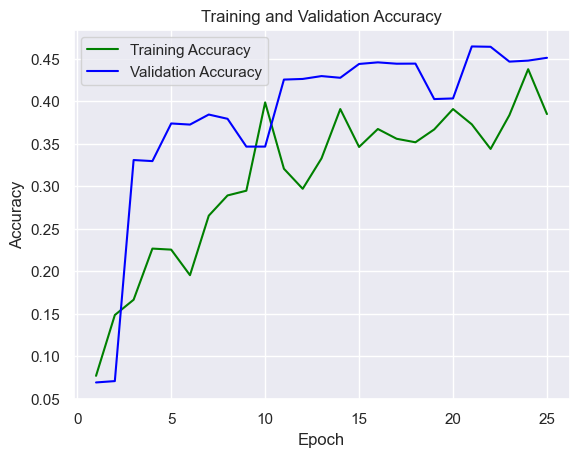

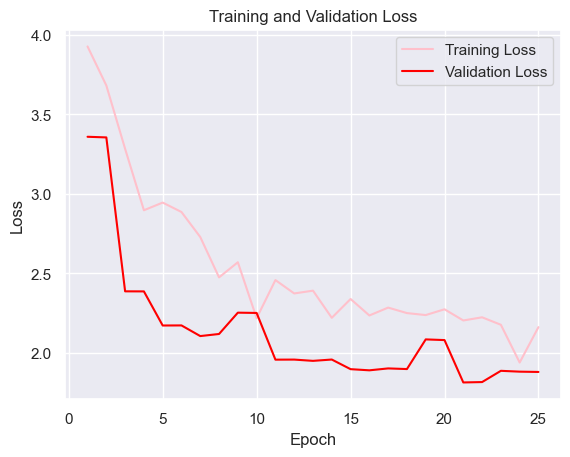

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

# Accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
# Loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

Following is our prediction:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


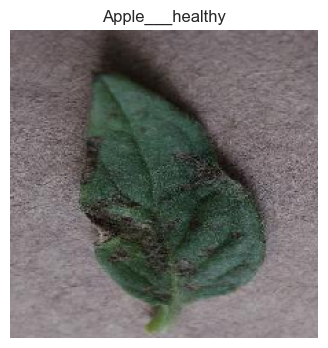

In [13]:
# predicting an image
from keras.preprocessing import image
import numpy as np
image_path = r"C:\Users\sk_ta\OneDrive\Desktop\NMIMS\Research Discourse\Plant_Disease_Classification\test\test\TomatoEarlyBlight6.JPG"
new_img = image.load_img(image_path, target_size=(224, 224))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = classifier.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = li[index]

##Another way
'''img_class = classifier.predict(img)
img_prob = classifier.predict(img)
print(img_class ,img_prob )'''

#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()